In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, log_loss
from torchsummary import summary
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [34]:
image = pd.read_csv('Cases/Image Segmentation/Image_Segmentation.csv')
image.head()

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.0,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811


In [35]:
X = image.drop('Class', axis=1)
y = image['Class']
le = LabelEncoder()
le_y = le.fit_transform(y)

In [66]:
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, le_y, test_size = 0.3,random_state=24,stratify=le_y)

In [37]:
scaler = MinMaxScaler()
X_scl_trn = scaler.fit_transform(X_train) 
X_scl_tst = scaler.transform(X_test)

In [38]:
X_torch = torch.from_numpy(X_scl_trn)

In [39]:
ohe = OneHotEncoder(sparse_output=False)
y_trn_ohe = ohe.fit_transform( y_train.reshape(-1,1) )
y_trn_ohe.shape

(146, 7)

In [67]:
y_trn_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [40]:
y_torch = torch.from_numpy(y_trn_ohe)

In [85]:
torch.manual_seed(24)
model = nn.Sequential(nn.Linear(in_features=X_train.shape[1], out_features=17),
                      nn.Tanh(),
                      nn.Linear(in_features=17, out_features=10),
                      nn.Tanh(), 
                      nn.Linear(in_features=10, out_features=7)
                     )

In [102]:
summary(model, (1,X_scl_trn.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 17]               340
├─Tanh: 1-2                              [-1, 1, 17]               --
├─Linear: 1-3                            [-1, 1, 10]               180
├─Tanh: 1-4                              [-1, 1, 10]               --
├─Linear: 1-5                            [-1, 1, 7]                77
Total params: 597
Trainable params: 597
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 17]               340
├─Tanh: 1-2                              [-1, 1, 17]               --
├─Linear: 1-3                            [-1, 1, 10]               180
├─Tanh: 1-4                              [-1, 1, 10]               --
├─Linear: 1-5                            [-1, 1, 7]                77
Total params: 597
Trainable params: 597
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [87]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.1)
optimizer

Adagrad (
Parameter Group 0
    differentiable: False
    eps: 1e-10
    foreach: None
    fused: None
    initial_accumulator_value: 0
    lr: 0.1
    lr_decay: 0
    maximize: False
    weight_decay: 0
)

In [88]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 1.2133e-01, -5.7329e-02, -1.9496e-01,  1.4124e-02,  2.1383e-01,
         -1.0233e-01, -7.4685e-02,  1.7941e-01, -3.1922e-02, -8.7622e-02,
         -4.6208e-02,  8.4010e-03, -1.8690e-01, -6.5564e-02,  2.2245e-01,
         -4.9180e-02,  2.0896e-01, -8.9563e-02, -9.2279e-02],
        [-6.8382e-02, -2.0513e-01, -1.3818e-01,  1.3865e-01, -1.7211e-01,
          7.8369e-02,  2.1585e-01, -2.9154e-02,  1.0036e-01,  1.0716e-01,
         -1.6376e-01, -8.8460e-02, -7.1846e-02,  2.2138e-01, -2.0476e-01,
          1.3887e-01,  2.1547e-01,  1.8139e-01,  9.7774e-02],
        [ 1.0213e-01, -1.2232e-02,  1.1543e-01,  2.0912e-01, -7.3770e-02,
          2.2167e-01,  3.6460e-02, -1.6091e-01, -1.6465e-01,  8.0917e-02,
         -3.2368e-02, -1.0106e-01,  1.1617e-01, -1.2101e-01, -1.0965e-01,
          4.2883e-02, -4.1423e-02, -1.9357e-01, -6.8920e-02],
        [-8.0626e-02, -9.7771e-02,  1.7860e-01, -3.4798e-02, -1.4012e-01,
          6.7971e-02,  3.9527e-02, -1.7419e-01, -2.1

In [89]:
y_pred = model(X_torch.float())
y_pred[:3]

tensor([[-0.3275,  0.2916,  0.2615, -0.1363,  0.1138, -0.0810,  0.1054],
        [-0.3209,  0.2804,  0.2608, -0.1262,  0.1119, -0.0809,  0.1144],
        [-0.3158,  0.2854,  0.2428, -0.1754,  0.1250, -0.1146,  0.1016]],
       grad_fn=<SliceBackward0>)

In [90]:
y_pred.shape, y_torch.shape

(torch.Size([146, 7]), torch.Size([146, 7]))

In [91]:
loss = criterion(y_pred, y_torch.float())
loss

tensor(1.9722, grad_fn=<DivBackward1>)

In [92]:
for epoch in np.arange(0,10000):
       # Forward pass: Compute predicted y by passing x to the model
       y_pred_prob = model(X_torch.float())

       # Compute and print loss
       loss = criterion(y_pred_prob, y_torch.float())
       if epoch%1000 == 0:
          print('epoch: ', epoch+1,' loss: ', loss.item())

       # Zero gradients, perform a backward pass, and update the weights.
       optimizer.zero_grad()

       # perform a backward pass (backpropagation)
       loss.backward()

       # Update the parameters
       optimizer.step()
#print('epoch: ', epoch+1,' loss: ', loss.item())

epoch:  1  loss:  1.9721837043762207
epoch:  1001  loss:  0.018027005717158318
epoch:  2001  loss:  0.005533433519303799
epoch:  3001  loss:  0.0028864077758044004
epoch:  4001  loss:  0.0018791789188981056
epoch:  5001  loss:  0.0013708502519875765
epoch:  6001  loss:  0.0010696927784010768
epoch:  7001  loss:  0.0008724082726985216
epoch:  8001  loss:  0.0007339862058870494
epoch:  9001  loss:  0.0006319103413261473


In [93]:
loss

tensor(0.0006, grad_fn=<DivBackward1>)

In [94]:
X_torch_test = torch.from_numpy(X_scl_tst)
type(X_torch_test)

torch.Tensor

In [95]:
y_wt_sum = model(X_torch_test.float()) 
softmax = nn.Softmax(dim=1)
y_pred_prob = softmax(y_wt_sum)
y_pred_prob[:3]

tensor([[2.0748e-07, 9.9987e-01, 1.7706e-06, 1.7717e-08, 3.2650e-05, 4.4605e-05,
         4.8567e-05],
        [4.9510e-06, 2.2440e-04, 3.4284e-05, 3.1411e-08, 9.9968e-01, 5.9921e-05,
         6.1871e-08],
        [5.4400e-05, 1.8532e-06, 4.4944e-06, 9.9989e-01, 5.2760e-08, 1.9382e-05,
         3.1594e-05]], grad_fn=<SliceBackward0>)

`detach().numpy()` converts `torch.Tensor` into `numpy` object

In [96]:
y_pred_prob = y_pred_prob.detach().numpy()
y_pred_prob.shape

(63, 7)

In [97]:
y_pred = np.argmax(y_pred_prob, axis=1 )
y_pred.shape

(63,)

### Test Set Accuracy Score

In [98]:
print(accuracy_score(y_test,y_pred))

0.0


### Test Set Log Loss

In [99]:
log_loss(y_test, y_pred_prob)

0.752319704631676

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [101]:
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)

ValueError: y contains previously unseen labels: ['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']

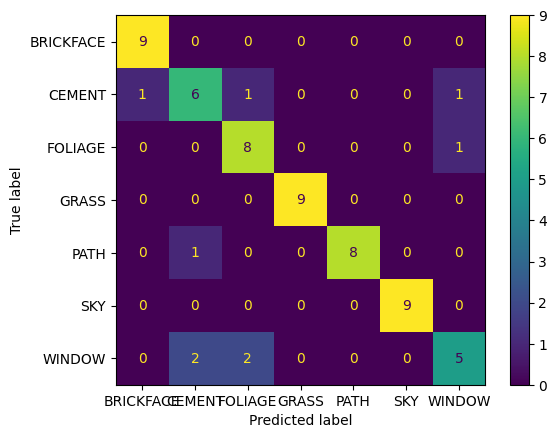

In [65]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = list(le.classes_))
disp.plot()
plt.show()

## 15 - 7

In [68]:
torch.manual_seed(24)
model = nn.Sequential(nn.Linear(in_features=X_train.shape[1], out_features=15),
                      nn.Tanh(),
                      nn.Linear(in_features=15, out_features=7)
                     )

In [69]:
summary(model, (1,X_train.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 15]               300
├─Tanh: 1-2                              [-1, 1, 15]               --
├─Linear: 1-3                            [-1, 1, 7]                112
Total params: 412
Trainable params: 412
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 15]               300
├─Tanh: 1-2                              [-1, 1, 15]               --
├─Linear: 1-3                            [-1, 1, 7]                112
Total params: 412
Trainable params: 412
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [70]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.1)
optimizer

Adagrad (
Parameter Group 0
    differentiable: False
    eps: 1e-10
    foreach: None
    fused: None
    initial_accumulator_value: 0
    lr: 0.1
    lr_decay: 0
    maximize: False
    weight_decay: 0
)

In [71]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.1213, -0.0573, -0.1950,  0.0141,  0.2138, -0.1023, -0.0747,  0.1794,
         -0.0319, -0.0876, -0.0462,  0.0084, -0.1869, -0.0656,  0.2225, -0.0492,
          0.2090, -0.0896, -0.0923],
        [-0.0684, -0.2051, -0.1382,  0.1386, -0.1721,  0.0784,  0.2159, -0.0292,
          0.1004,  0.1072, -0.1638, -0.0885, -0.0718,  0.2214, -0.2048,  0.1389,
          0.2155,  0.1814,  0.0978],
        [ 0.1021, -0.0122,  0.1154,  0.2091, -0.0738,  0.2217,  0.0365, -0.1609,
         -0.1647,  0.0809, -0.0324, -0.1011,  0.1162, -0.1210, -0.1097,  0.0429,
         -0.0414, -0.1936, -0.0689],
        [-0.0806, -0.0978,  0.1786, -0.0348, -0.1401,  0.0680,  0.0395, -0.1742,
         -0.2197,  0.1736, -0.2125,  0.2277,  0.1281,  0.1915, -0.1997,  0.0844,
         -0.2227,  0.0653,  0.1046],
        [ 0.0336, -0.0821, -0.0851, -0.0189,  0.2147,  0.1317,  0.1560, -0.0838,
          0.0539, -0.1416, -0.0292, -0.1137,  0.0956,  0.1176,  0.0285,  0.1821,
         -0.2279,  0

In [72]:
y_pred = model(X_torch.float())
y_pred[:3]

tensor([[ 0.0749,  0.0470, -0.2748, -0.1601,  0.0599, -0.1301,  0.2554],
        [ 0.0668,  0.0334, -0.2953, -0.1401,  0.0586, -0.1213,  0.2542],
        [ 0.0362,  0.0327, -0.2762, -0.1574, -0.0125, -0.0122,  0.2632]],
       grad_fn=<SliceBackward0>)

In [73]:
y_pred.shape, y_torch.shape

(torch.Size([146, 7]), torch.Size([146, 7]))

In [74]:
loss = criterion(y_pred, y_torch.float())
loss

tensor(1.9105, grad_fn=<DivBackward1>)

In [75]:
for epoch in np.arange(0,10000):
       # Forward pass: Compute predicted y by passing x to the model
       y_pred_prob = model(X_torch.float())

       # Compute and print loss
       loss = criterion(y_pred_prob, y_torch.float())
       if epoch%1000 == 0:
          print('epoch: ', epoch+1,' loss: ', loss.item())

       # Zero gradients, perform a backward pass, and update the weights.
       optimizer.zero_grad()

       # perform a backward pass (backpropagation)
       loss.backward()

       # Update the parameters
       optimizer.step()
#print('epoch: ', epoch+1,' loss: ', loss.item())

epoch:  1  loss:  1.9105077981948853
epoch:  1001  loss:  0.06769460439682007
epoch:  2001  loss:  0.03648197278380394
epoch:  3001  loss:  0.017793113365769386
epoch:  4001  loss:  0.009359102696180344
epoch:  5001  loss:  0.0058330693282186985
epoch:  6001  loss:  0.004090685397386551
epoch:  7001  loss:  0.0030897262040525675
epoch:  8001  loss:  0.0024527241475880146
epoch:  9001  loss:  0.0020170044153928757


In [76]:
loss

tensor(0.0017, grad_fn=<DivBackward1>)

In [77]:
X_torch_test = torch.from_numpy(X_scl_tst)
type(X_torch_test)

torch.Tensor

In [78]:
y_wt_sum = model(X_torch_test.float()) 
softmax = nn.Softmax(dim=1)
y_pred_prob = softmax(y_wt_sum)
y_pred_prob[:3]

tensor([[1.6672e-08, 9.9997e-01, 4.9517e-11, 2.7907e-09, 7.9897e-06, 7.3032e-08,
         2.6510e-05],
        [8.7353e-12, 7.5507e-05, 1.5220e-10, 2.0825e-08, 9.9992e-01, 2.7334e-07,
         2.8092e-12],
        [1.2831e-08, 4.4501e-14, 1.0521e-07, 1.0000e+00, 7.7624e-07, 1.0676e-10,
         4.7412e-10]], grad_fn=<SliceBackward0>)

`detach().numpy()` converts `torch.Tensor` into `numpy` object

In [79]:
y_pred_prob = y_pred_prob.detach().numpy()
y_pred_prob.shape

(63, 7)

In [80]:
y_pred = np.argmax(y_pred_prob, axis=1 )
y_pred.shape

(63,)

### Test Set Accuracy Score

In [81]:
print(accuracy_score(y_test,y_pred))

0.0


### Test Set Log Loss

In [82]:
log_loss(y_test, y_pred_prob)

0.6011281984006083

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [84]:
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)

ValueError: y contains previously unseen labels: ['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']

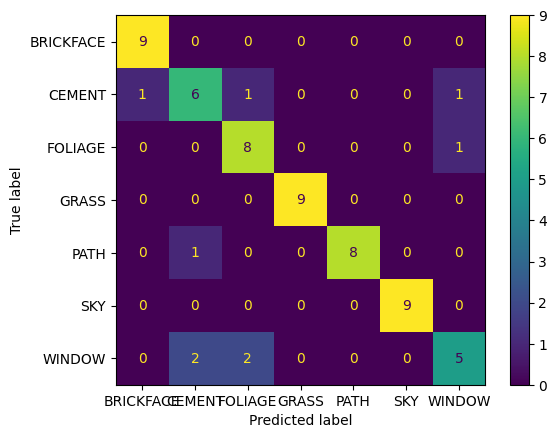

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = list(le.classes_))
disp.plot()
plt.show()

## HR Dataset

In [107]:
from torch.utils.data import DataLoader
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset

In [108]:
df = pd.read_csv("./Cases/human-resources-analytics/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [109]:
dum_df = pd.get_dummies(df,drop_first=True)
X = dum_df.drop('left', axis=1)
scaler = MinMaxScaler()
y = dum_df['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=24,stratify=y)
X_scl_trn = scaler.fit_transform(X_train) 
X_scl_tst = scaler.transform(X_test) 


In [110]:
X_torch = torch.from_numpy(X_scl_trn)
y_torch = torch.from_numpy(y_train)
print(X_torch.size())
print(y_torch.size())

torch.Size([10496, 18])
torch.Size([10496])


In [111]:
joint_dataset = TensorDataset(X_torch.float(), y_torch.float())

torch.manual_seed(24)
data_loader = DataLoader(dataset=joint_dataset, batch_size=30, shuffle=True)

In [112]:
model = nn.Sequential(nn.Linear(in_features=X_scl_trn.shape[1], out_features=1))

criterion = torch.nn.BCEWithLogitsLoss()
# Construct the optimizer (Adam in this case)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [113]:
y_pred = model(X_torch.float())
y_torch = y_torch.unsqueeze(1)
print(y_torch.shape)
print(y_pred.shape)

torch.Size([10496, 1])
torch.Size([10496, 1])


In [114]:
for epoch in np.arange(0,100):
    for i, batch in enumerate(data_loader, 1):
      # Forward pass: Compute predicted y by passing x to the model
      y_pred_prob = model(batch[0].float())

      # Compute and print loss
      loss = criterion(y_pred_prob, batch[1].float().unsqueeze(1))

      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()

      # perform a backward pass (backpropagation)
      loss.backward()

      # Update the parameters
      optimizer.step()
    
    if epoch%10 == 0:
          print('epoch: ', epoch+1,' train loss: ', loss.item())
          
          
X_torch_test = torch.from_numpy(X_scl_tst)
y_torch_test = torch.from_numpy(y_test)
y_torch_test = y_torch_test.unsqueeze(1)
print(y_torch_test.shape)

epoch:  1  train loss:  0.4811733365058899
epoch:  11  train loss:  0.5253878831863403
epoch:  21  train loss:  0.36816149950027466
epoch:  31  train loss:  0.37195441126823425
epoch:  41  train loss:  0.3988130986690521
epoch:  51  train loss:  0.4829082787036896
epoch:  61  train loss:  0.4710504114627838
epoch:  71  train loss:  0.12753722071647644
epoch:  81  train loss:  0.3900519609451294
epoch:  91  train loss:  0.26677173376083374
torch.Size([4499, 1])


In [115]:
lin_output = model(X_torch_test.float()) # Equivalent predict_proba / predict
np_out = lin_output.detach().numpy()
y_pred_prob = 1 / (1 + np.exp(-np_out))
y_pred_prob[:5]


y_pred_prob = y_pred_prob.reshape(y_test.shape[0],)


y_pred = np.where(y_pred_prob >= 0.5,1,0)

print(accuracy_score(y_test,y_pred))  

0.7872860635696821


## MLPClassifer

In [ ]:
torch.manual_seed(0)
class MLPClassifier(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(in_features=num_features, out_features=15)
        self.linear2 = nn.Linear(in_features=15, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)
        self.act1 = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act1(x)
        output = self.linear3(x)
        return output

In [129]:
from torch.utils.data import DataLoader
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset

  
df = pd.read_csv("./Cases/human-resources-analytics/HR_comma_sep.csv")
dum_df = pd.get_dummies(df,drop_first=True)
dum_df.head()


X = dum_df.drop('left', axis=1)
scaler = MinMaxScaler()

y = dum_df['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=24,stratify=y)
X_scl_trn = scaler.fit_transform(X_train) 
X_scl_tst = scaler.transform(X_test) 


X_torch = torch.from_numpy(X_scl_trn)
y_torch = torch.from_numpy(y_train)
print(X_torch.size())
print(y_torch.size())

joint_dataset = TensorDataset(X_torch.float(), y_torch.float())

torch.manual_seed(24)
data_loader = DataLoader(dataset=joint_dataset, batch_size=30, shuffle=True)


#model = nn.Sequential(nn.Linear(in_features=X_scl_trn.shape[1], out_features=1))

torch.manual_seed(24)
class MLPClassifier(torch.nn.Module):    
    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(in_features=num_features, out_features=15)
        self.linear2 = nn.Linear(in_features=15, out_features=7)
        self.linear3 = nn.Linear(in_features=7, out_features=1)
        self.act1 = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act1(x)        
        output = self.linear3(x)
        return output
        
model = MLPClassifier(num_features = X_scl_trn.shape[1])


criterion = torch.nn.BCEWithLogitsLoss()
# Construct the optimizer (Adam in this case)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
optimizer


y_pred = model(X_torch.float())
y_torch = y_torch.unsqueeze(1)
print(y_torch.shape)
print(y_pred.shape)

history = {'train_loss': [], 'epoch': []}

# Gradient Descent

for epoch in np.arange(0,100):
    for i, batch in enumerate(data_loader, 1):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred_prob = model(batch[0].float())

        # Compute and print loss
        loss = criterion(y_pred_prob, batch[1].float().unsqueeze(1))

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()

        # perform a backward pass (backpropagation)
        loss.backward()

        # Update the parameters
        optimizer.step()

    if epoch%10 == 0:
        print('epoch: ', epoch+1,' train loss: ', loss.item())
        history['train_loss'].append(loss.item())
        history['epoch'].append(epoch)
          
X_torch_test = torch.from_numpy(X_scl_tst)
y_torch_test = torch.from_numpy(y_test)
y_torch_test = y_torch_test.unsqueeze(1)
print(y_torch_test.shape)



lin_output = model(X_torch_test.float()) # Equivalent predict_proba / predict
np_out = lin_output.detach().numpy()
y_pred_prob = 1 / (1 + np.exp(-np_out))
y_pred_prob[:5]


y_pred_prob = y_pred_prob.reshape(y_test.shape[0],)


y_pred = np.where(y_pred_prob >= 0.5,1,0)

print(accuracy_score(y_test,y_pred))  
    
    
log_loss(y_test, y_pred_prob)


torch.Size([10496, 18])
torch.Size([10496])
torch.Size([10496, 1])
torch.Size([10496, 1])
epoch:  1  train loss:  0.6633834838867188
epoch:  11  train loss:  0.09882447123527527
epoch:  21  train loss:  0.2586304843425751
epoch:  31  train loss:  0.12538249790668488
epoch:  41  train loss:  0.08723057061433792
epoch:  51  train loss:  0.13292667269706726
epoch:  61  train loss:  0.021855883300304413
epoch:  71  train loss:  0.09706327319145203
epoch:  81  train loss:  0.05502345785498619
epoch:  91  train loss:  0.16244331002235413
torch.Size([4499, 1])
0.9555456768170705


0.13737448802714328

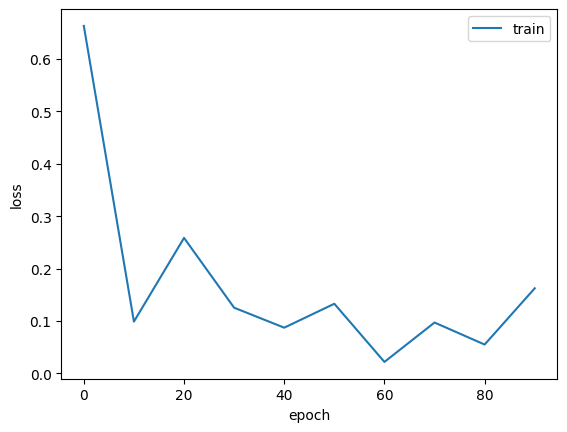

In [130]:
# plot history
plt.plot(history['epoch'], history['train_loss'], label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

torch.Size([146, 19])
torch.Size([146, 7])
torch.Size([146, 1, 7])
torch.Size([146, 7])
epoch:  1  train loss:  1.9037859439849854
epoch:  11  train loss:  0.6341118812561035
epoch:  21  train loss:  0.2504810392856598
epoch:  31  train loss:  0.17110562324523926
epoch:  41  train loss:  0.3772144317626953
epoch:  51  train loss:  0.23258325457572937
epoch:  61  train loss:  0.3565141260623932
epoch:  71  train loss:  0.006154099013656378
epoch:  81  train loss:  0.06240613013505936
epoch:  91  train loss:  0.012729808688163757


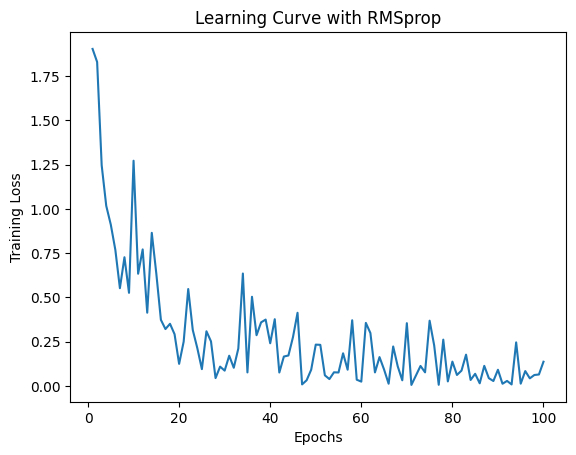

torch.Size([63, 1])
0.8412698412698413
0.8214906527908638


In [131]:
from torch.utils.data import DataLoader
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

df = pd.read_csv("./Cases/Image Segmentation/Image_Segmentation.csv")
X = df.drop('Class', axis=1)
y = df['Class']

le = LabelEncoder()
le_y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, le_y, test_size = 0.3, 
                                                    random_state=24,stratify=le_y)
                                                    
ohe = OneHotEncoder(sparse_output=False)
y_trn_ohe = ohe.fit_transform( y_train.reshape(-1,1) )
y_trn_ohe.shape

scaler = MinMaxScaler()
X_scl_trn = scaler.fit_transform(X_train) 
X_scl_tst = scaler.transform(X_test) 

X_torch = torch.from_numpy(X_scl_trn)
y_torch = torch.from_numpy(y_trn_ohe)
print(X_torch.size())
print(y_torch.size())

joint_dataset = TensorDataset(X_torch.float(), y_torch.float())

torch.manual_seed(24)
data_loader = DataLoader(dataset=joint_dataset, batch_size=64, shuffle=True)

torch.manual_seed(24)
class MLPClassifier(torch.nn.Module):    
    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(in_features=num_features, out_features=15)
        self.linear2 = nn.Linear(in_features=15, out_features=7)
        self.linear3 = nn.Linear(in_features=7, out_features=7)
        self.act1 = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act1(x)        
        output = self.linear3(x)
        return output
        
model = MLPClassifier(num_features = X_scl_trn.shape[1])

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)


y_pred = model(X_torch.float())
y_torch = y_torch.unsqueeze(1)
print(y_torch.shape)
print(y_pred.shape)

# Gradient Descent
losses = []
for epoch in np.arange(0,100):
    for i, batch in enumerate(data_loader, 1):
      # Forward pass: Compute predicted y by passing x to the model
      y_pred_prob = model(batch[0].float())

      # Compute and print loss
      loss = criterion(y_pred_prob, batch[1].float())

      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()

      # perform a backward pass (backpropagation)
      loss.backward()

      # Update the parameters
      optimizer.step()
    
    if epoch%10 == 0:
          print('epoch: ', epoch+1,' train loss: ', loss.item())

    losses.append(loss.item())
    
    
plt.plot(range(1, 101), losses)
plt.xlabel("Epochs")
plt.title("Learning Curve with RMSprop")
plt.ylabel("Training Loss")
plt.show()


X_torch_test = torch.from_numpy(X_scl_tst)
y_torch_test = torch.from_numpy(y_test)
y_torch_test = y_torch_test.unsqueeze(1)
print(y_torch_test.shape)

y_wt_sum = model(X_torch_test.float()) 
softmax = nn.Softmax(dim=1)
y_pred_prob = softmax(y_wt_sum)
y_pred_prob[:3]


y_pred_prob = y_pred_prob.detach().numpy()
y_pred = np.argmax(y_pred_prob, axis=1 )

print(accuracy_score(y_test,y_pred))

print(log_loss(y_test, y_pred_prob))

